# Stocks Analysis
The objective of this case study is to use a regression-based model and another statistical model for time series analysis to predict the value of stocks.

# Content

* [1. Introduction](#2)
* [2. Business Understanding](#3)
* [3. Data Understanding](#4)
    * [3.1 Load Libraries](#4.1)    
    * [3.2. Load Dataset](#4.2)
    * [3.3. Exploratory Data Analysis](#4.3)
    * [3.4. Descriptive Statistics](#4.4)
    * [3.5. Data Visualisation](#4.5)
* [4. Data Preparation](#5)
* [5. Modeling](#6)
    * [5.1 Train / Test Split](#6.1) 
    * [5.2.Linear Regression Model](#6.2) 
* [6.Data Preparation ARIMA Model](#7)        
    * [6.1. Stationary Time Series](#7.1)
    * [6.2. Checks for Stationarity](#7.2)
        * [6.2.1. Summary Statistics](#7.2.1)
        * [6.2.2. Augmented Dickey-Fuller test](#7.2.2)
    * [6.3. Use and Remove Trends](#7.3)
* [7. ARIMA Model](#8)
    * [7.1. Hyperparameters for ARIMA model](#8.1)
* [8. Comparision Linear Regression vs ARIMA](#9)
* [9. References](#10) 

<a id='2'></a>
# 1. Introduction 

**Understanding ETFs**

Exchange-Traded Funds (ETFs) are investment instruments that merge features of mutual funds with the trading ease of individual stocks. Unlike stocks, which represent a share of ownership in a single company, an ETF tracks a diversified group of assets, including stocks, bonds, and commodities. This diversification makes them appealing to investors looking to gain exposure to different market sectors.

With this framework in mind, we will approach our analytical project from a macro-to-micro perspective, initially focusing on a database of the most prominent ETFs in the industry. From this selection, we will identify the ETF that has shown the highest average return over a ten-year time horizon. Our analysis will delve deeper into the portfolio of this specific ETF, selecting the company that has the most significant influence within it, and then carry out a detailed analysis of its stocks.

To ensure an orderly and effective progression in our project, we will adopt the CRISP-DM methodology (Cross-Industry Standard Process for Data Mining). This systematic guide will take us through all the necessary stages, from the initial understanding of our objectives through data preparation and analysis, to model evaluation and subsequent implementation.

All data used in this project is for public use and can be found at the following links:

* https://www.ishares.com/us/products/etf-investments#/?productView=etf&pageNumber=1&sortColumn=totalNetAssets&sortDirection=desc&dataView=keyFacts

* https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs

<font color='red'>Note : This project focuses on the analysis and evaluation of Machine Learning and Data Analytics tools to determine the optimal models in predicting the profitability of stocks.The project does not aim to provide incentives or advice on stock investments. Any investment, including ETFs, comes with risks. Before investing in an ETF, it's crucial to fully research and understand its characteristics and risks. It's highly recommended to consult with a financial advisor or investment expert when exploring investment options. </font> 

<a id='3'></a>
# 2. Business Understanding

Through supervised learning with a regression task, we will use a Linear Regression model to predict the closing price of the stocks. On the other hand, we will also use the ARIMA model, which is a statistical model for time series analysis, to predict the closing price of the stocks as well. Finally, we will perform a comparison of these two models to determine which one best fits our data.

The research will focus on the evolution of four critical stock market variables over a decade: the opening price, the highest price, the lowest price, and the closing price of the stocks. To maintain a purely quantitative approach, we will deliberately set aside the influence of external factors such as geopolitical, economic, and environmental changes, allowing us an objective comparison between the two selected analytical models.

<a id='4'></a>
# 3. Data Understanding

<a id='4.1'></a>
## 3.1. Load Libraries

In [1]:
# We import all the libraries that we need in our analysis and we will import others as we need them.

import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

<a id='4.2'></a>
## 3.2. Load Dataset

In [2]:
# Importing the dataset.

df_ETF = pd.read_excel('iShares_UnitedStates_Modified.xls')

<a id='4.3'></a>
## 3.3. Exploratory Data Analysis

In [3]:
df_ETF.head()

,Ticker,Name,SEDOL,ISIN,CUSIP,Incept. Date,Gross Expense Ratio (%),Net Expense Ratio (%),Net Assets (USD),Net Assets as of,...,Fixed Income Characteristics - Option Adjusted Spread,Fixed Income Characteristics - Avg. Yield (%),Fixed Income Characteristics - Avg. Yield as of Date,Sustainability Characteristics (MSCI ESG Fund Ratings) - MSCI ESG Fund Rating (AAA-CCC),Sustainability Characteristics (MSCI ESG Fund Ratings) - MSCI ESG Quality Score (0-10),Sustainability Characteristics (MSCI ESG Fund Ratings) - MSCI Weighted Average Carbon Intensity (Tons CO2E/$M SALES),Sustainability Characteristics (MSCI ESG Fund Ratings) - MSCI ESG % Coverage,Sustainability Characteristics (MSCI ESG Fund Ratings) - Sustainable Classification,Sustainability Characteristics (MSCI ESG Fund Ratings) - As of,Sustainability Characteristics (MSCI ESG Fund Ratings) - Based on holdings as of
0,IVV,iShares Core S&P 500 ETF,-,US4642872000,464287200,2000-05-15,0.03,0.03,3.421875e+11,2023-10-20,...,0.00682,-,-,A,6.6003,113.33,98.88,-,2023-09-21 00:00:00,2023-08-31 00:00:00
1,IEFA,iShares Core MSCI EAFE ETF,-,US46432F8427,46432F842,2012-10-18,0.07,0.07,9.263588e+10,2023-10-20,...,0.00013,-,-,AA,7.5536,106.96,99.7,-,2023-09-21 00:00:00,2023-08-31 00:00:00
2,AGG,iShares Core U.S. Aggregate Bond ETF,-,US4642872265,464287226,2003-09-22,0.03,0.03,8.885685e+10,2023-10-20,...,56.15833,5.74,2023-10-19 00:00:00,A,6.0752,271.14,66.92,-,2023-09-21 00:00:00,2023-08-31 00:00:00
3,IWF,iShares Russell 1000 Growth ETF,-,US4642876142,464287614,2000-05-22,0.19,0.19,6.885560e+10,2023-10-20,...,0.00214,-,-,A,6.6448,30.75,99.45,-,2023-09-21 00:00:00,2023-08-31 00:00:00
4,IEMG,iShares Core MSCI Emerging Markets ETF,-,US46434G1031,46434G103,2012-10-18,0.09,0.09,6.719045e+10,2023-10-20,...,0.00226,-,-,BBB,5.3425,337.9,95.65,-,2023-09-21 00:00:00,2023-08-31 00:00:00


In [4]:
# Columns of interest
columns_selected = [
    "Ticker", 
    "Name", 
    "Gross Expense Ratio (%)", 
    "Avg. Annual Return: Price Monthly - 1Y (%)",
    "Avg. Annual Return: Price Monthly - 3Y (%)",
    "Avg. Annual Return: Price Monthly - 5Y (%)",
    "Avg. Annual Return: Price Monthly - 10Y (%)"
]

# New DataFrame
df_selected = df_ETF[columns_selected]
df_selected.head(-5)

,Ticker,Name,Gross Expense Ratio (%),Avg. Annual Return: Price Monthly - 1Y (%),Avg. Annual Return: Price Monthly - 3Y (%),Avg. Annual Return: Price Monthly - 5Y (%),Avg. Annual Return: Price Monthly - 10Y (%)
0,IVV,iShares Core S&P 500 ETF,0.03,21.691873,10.174129,9.896895,11.873788
1,IEFA,iShares Core MSCI EAFE ETF,0.07,25.2,5.23,3.05,4
2,AGG,iShares Core U.S. Aggregate Bond ETF,0.03,0.54,-5.21,0.08,1.09
3,IWF,iShares Russell 1000 Growth ETF,0.19,27.457088,7.796373,12.204825,14.26745
4,IEMG,iShares Core MSCI Emerging Markets ETF,0.09,13.37,-0.89,1.06,2.29
...,...,...,...,...,...,...,...
421,ITDC,iShares® LifePath® Target Date 2035 ETF,0.10,-,-,-,-
422,ITDD,iShares® LifePath® Target Date 2040 ETF,0.11,-,-,-,-
423,IBIJ,iShares® iBonds® Oct 2033 Term TIPS ETF,0.10,-,-,-,-
424,ITDE,iShares® LifePath® Target Date 2045 ETF,0.11,-,-,-,-


In [5]:
# Convert column to floating point numbers
df_selected["Avg. Annual Return: Price Monthly - 10Y (%)"] = pd.to_numeric(df_selected["Avg. Annual Return: Price Monthly - 10Y (%)"], errors='coerce')

# Top 10 ETFs Avg. Annual Return 10 years
top_10_10_years = df_selected.sort_values(by="Avg. Annual Return: Price Monthly - 10Y (%)", ascending=False).head(10)
top_10_10_years[['Ticker', 'Name', 'Avg. Annual Return: Price Monthly - 10Y (%)']]


,Ticker,Name,Avg. Annual Return: Price Monthly - 10Y (%)
62,SOXX,iShares Semiconductor ETF,23.140869
44,IYW,iShares U.S. Technology ETF,19.191494
101,IXN,iShares Global Tech ETF,17.690000
105,IGM,iShares Expanded Tech Sector ETF,17.664976
80,IGV,iShares Expanded Tech-Software Sector ETF,16.448680
67,IWY,iShares Russell Top 200 Growth ETF,15.570100
222,SMIN,iShares MSCI India Small-Cap ETF,14.980000
3,IWF,iShares Russell 1000 Growth ETF,14.267450
137,ITB,iShares U.S. Home Construction ETF,13.972729
83,IHI,iShares U.S. Medical Devices ETF,13.712762


The table above shows that SOXX is the most profitable ETF, with a return of 23.14% over 10 years.

According to the previous exploration, we are going to load the database of the companies that make up the SOXX ETF to carry out a brief exploration and subsequently analyze the stocks.

In [6]:
# Importing the dataset.
df_SOXX = pd.read_csv('SOXX_holdings_Modified.csv')

In [7]:
df_SOXX.head()

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,Price,Location,Exchange,Currency,FX Rate,Market Currency,Accrual Date
0,AMD,ADVANCED MICRO DEVICES INC,Information Technology,Equity,"712,720,222.11",8.47,"712,720,222.11","7,010,133.00",101.67,United States,NASDAQ,USD,1,USD,-
1,AVGO,BROADCOM INC,Information Technology,Equity,"707,559,525.52",8.41,"707,559,525.52","803,032.00",881.11,United States,NASDAQ,USD,1,USD,-
2,NVDA,NVIDIA CORP,Information Technology,Equity,"655,640,551.59",7.79,"655,640,551.59","1,501,593.00",436.63,United States,NASDAQ,USD,1,USD,-
3,INTC,INTEL CORPORATION CORP,Information Technology,Equity,"567,706,991.40",6.75,"567,706,991.40","16,412,460.00",34.59,United States,NASDAQ,USD,1,USD,-
4,TXN,TEXAS INSTRUMENT INC,Information Technology,Equity,"504,187,420.88",5.99,"504,187,420.88","3,431,714.00",146.92,United States,NASDAQ,USD,1,USD,-


In [8]:
# Sorting the Dataframe based on the "Weight (%)" column from highest to lowest.
df_sorted = df_SOXX[['Ticker', 'Name', 'Weight (%)']].sort_values(by='Weight (%)', ascending=False)

df_sorted.head()

,Ticker,Name,Weight (%)
0,AMD,ADVANCED MICRO DEVICES INC,8.47
1,AVGO,BROADCOM INC,8.41
2,NVDA,NVIDIA CORP,7.79
3,INTC,INTEL CORPORATION CORP,6.75
4,TXN,TEXAS INSTRUMENT INC,5.99


According to the previous table, the company that has the greatest weight within the SOXX portfolio is the company ADVANCED MICRO DEVICES INC (AMD) with 8.47%.

Therefore, we will analyze the company AMD to observe the behaviour of its stocks from 2007 to 2017.

In [9]:
# Load Dataset AMD Stocks
amd_data = pd.read_csv('df_AMD_stocks.csv')

amd_data.head(-5)

,Date,Open,High,Low,Close,Volume
0,21/03/1983,8.970,9.03,8.81,9.000,528000
1,22/03/1983,8.720,8.97,8.50,8.500,332400
2,23/03/1983,8.500,8.81,8.47,8.720,442400
3,24/03/1983,8.720,8.78,8.66,8.780,412000
4,25/03/1983,8.910,9.06,8.75,8.880,216400
...,...,...,...,...,...,...
8727,30/10/2017,11.255,11.42,10.65,10.890,137785101
8728,31/10/2017,10.760,11.31,10.69,10.985,78600023
8729,01/11/2017,11.250,11.29,10.72,10.800,66875483
8730,02/11/2017,10.870,10.99,10.66,10.850,47942464


In [10]:
# shape
amd_data.shape

(8737, 6)

In [11]:
amd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8737 non-null   object 
 1   Open    8737 non-null   float64
 2   High    8737 non-null   float64
 3   Low     8737 non-null   float64
 4   Close   8737 non-null   float64
 5   Volume  8737 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 409.7+ KB


<a id='4.4'></a>
## 3.4. Descriptive Statistics

In [12]:
# describe
amd_data.describe()

,Open,High,Low,Close,Volume
count,8737.000000,8737.000000,8737.000000,8737.000000,8.737000e+03
mean,10.839869,11.074302,10.584916,10.828801,1.164218e+07
std,7.189474,7.365667,7.000728,7.188456,1.701616e+07
min,1.620000,1.690000,1.610000,1.620000,0.000000e+00
25%,5.440000,5.570000,5.300000,5.440000,1.405400e+06
50%,9.190000,9.380000,8.970000,9.150000,5.729558e+06
75%,14.500000,14.810000,14.240000,14.500000,1.563800e+07
max,47.000000,48.500000,45.500000,47.500000,2.677054e+08


This analysis is based on closing prices.

Count: There are 8737 observations in our data.

Mean: The average closing price of the shares is approximately 10.83 USD. This means that, on average, AMD shares closed around this price during the period from 1983 to 2017.

Std: The standard deviation is approximately 7.19 USD. This is a measure of the dispersion of closing prices around the mean. A higher standard deviation indicates greater volatility in the share closing price.

Min: The lowest recorded closing price is 1.62 USD, which would be the lowest value at which the shares closed on any day during 1983 to 2017.

25%: The first quartile is 5.44 USD, which means that 25% of the closing prices are less than or equal to this value. This also indicates that 75% of the closing prices are above this value.

50%: The median is 9.15 USD, which is the middle value of the data. The median is less sensitive to outliers and is often considered a better measure of central tendency when the distribution is not symmetrical.

75%: The third quartile is 14.5 USD, which means that 75% of the closing prices are less than or equal to this value and 25% are higher.

Max: The highest closing price is 47.5 USD, which would be the highest value at which the shares closed on any day during the data set period.

The maximum volume value is notably high compared to the average, which may indicate trading days with unusually high activity, possibly due to specific events that affected the company or the market in general.

<a id='4.5'></a>
## 3.5. Data Visualisation

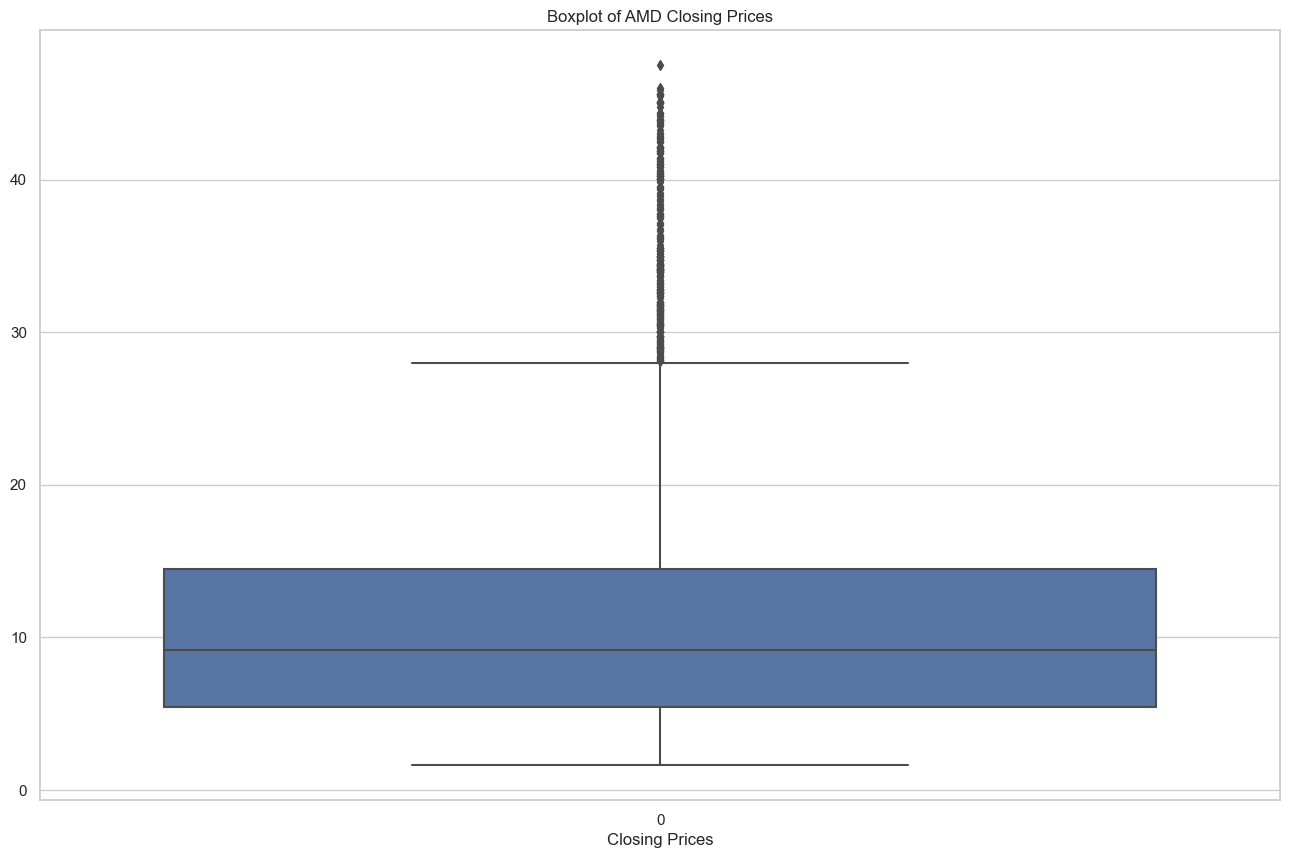

In [13]:
# Box plot

sns.set(style="whitegrid")

plt.figure(figsize=(16, 10))
sns.boxplot(amd_data['Close'])

plt.title('Boxplot of AMD Closing Prices')
plt.xlabel('Closing Prices')

plt.show()

As we can see, the data does not have a normal distribution, but this behavior is normal according to the behavior of the shares in the market.
Here are some reasons why this is common:

Volatility: In financial markets, volatility tends to cluster; there are periods of high volatility followed by periods of low volatility. This can cause the distribution of returns (or price changes) to deviate from normality.

Bias: Stock prices often show bias, either positive (where there is a possibility of large gains) or negative (where there is a possibility of large losses, as during a financial crisis).

Heavy Tails: The distribution of stock prices usually has heavier tails than a normal distribution. This means that there is a greater probability of observing extreme events (large price changes) than the normal distribution would predict.

Psychological Floors and Ceilings: Traders and investors often act at price levels that are round or significant, which can cause the price distribution to be non-normal.

Market Interventions: Government policies, company announcements, and other events can cause price movements that are not normally distributed.

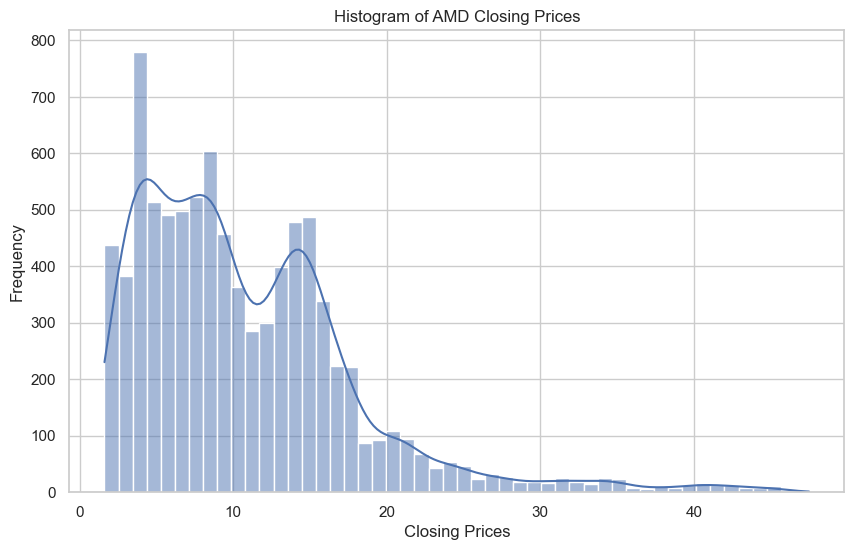

In [14]:
# Histogram AMD Stocks
plt.figure(figsize=(10, 6))
sns.histplot(amd_data['Close'], bins=50, kde=True)

plt.title('Histogram of AMD Closing Prices')
plt.xlabel('Closing Prices')
plt.ylabel('Frequency')

plt.show()

<a id='5'></a>
# 4. Data Preparation

As we can see, our data has a total of 8737 records ranging from 1983 to 20017.
For our analysis we will only take the last 10 years of stock behavior to predict the closing price (2007 to 2017).
We consider that 10 years is a sufficient amount of information so that the models we are going to use can be trained correctly since if we use data that is too old it can make the model less accurate. It is important that the data reflects the most recent and relevant patterns.

In [15]:
# Convert the 'Date' column to datetime
amd_data['Date'] = pd.to_datetime(amd_data['Date'], format='%d/%m/%Y')

# Filter the data between 2007 and 2017
df_AMD_stocks_10y = amd_data[(amd_data['Date'].dt.year >= 2007) & (amd_data['Date'].dt.year <= 2017)]

df_AMD_stocks_10y.head(-5)

,Date,Open,High,Low,Close,Volume
6001,2007-01-03,20.080,20.40,19.35,19.520,28107900
6002,2007-01-04,19.660,19.86,19.32,19.790,23380300
6003,2007-01-05,19.540,19.91,19.54,19.710,15772600
6004,2007-01-08,19.710,19.86,19.25,19.470,15814600
6005,2007-01-09,19.450,19.71,19.37,19.650,14098100
...,...,...,...,...,...,...
8727,2017-10-30,11.255,11.42,10.65,10.890,137785101
8728,2017-10-31,10.760,11.31,10.69,10.985,78600023
8729,2017-11-01,11.250,11.29,10.72,10.800,66875483
8730,2017-11-02,10.870,10.99,10.66,10.850,47942464


In [16]:
# Null Counts
null_counts_stocks = df_AMD_stocks_10y.isnull().sum()
null_counts_stocks

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

<a id='6'></a>
# 5. Modeling

<a id='6.1'></a>
## 5.1. Train / Test Split

To train our linear regression model we will assign our independent variables as 'Open', 'High', 'Low', and our dependent variable 'Close'.
In addition, we will divide the training of the model into 80% for training and 20% for testing.

On the other hand, we will use Standard Scaler to normalize the characteristics of our data and Cross-Validation to ensure that the model is capable of making accurate predictions on unseen data, that is, that it generalizes well.

In [17]:
# Split the dataset into X and y columns
X = df_AMD_stocks_10y[['Open', 'High', 'Low']] # Independent variable 
y = df_AMD_stocks_10y['Close'] # Dependent variable

X, y

(       Open   High     Low
 6001  20.08  20.40  19.350
 6002  19.66  19.86  19.320
 6003  19.54  19.91  19.540
 6004  19.71  19.86  19.250
 6005  19.45  19.71  19.370
 ...     ...    ...     ...
 8732  12.04  12.09  11.640
 8733  11.94  12.27  11.940
 8734  11.94  11.95  11.510
 8735  11.25  11.35  11.030
 8736  11.22  11.43  11.115
 
 [2736 rows x 3 columns],
 6001    19.52
 6002    19.79
 6003    19.71
 6004    19.47
 6005    19.65
         ...  
 8732    11.93
 8733    12.05
 8734    11.71
 8735    11.12
 8736    11.26
 Name: Close, Length: 2736, dtype: float64)

<a id='6.2'></a>
## 5.2. Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

# 80 Train - Test 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2736, 3), (2736,), (2188, 3), (548, 3), (2188,), (548,))

In [19]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Cross Validation Score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring='r2')
    
    print('Mean R^2 in Cross Validation CV Mean: ', np.mean(scores))
    print('Standard Deviation of R^2 in Cross Validation STD: ', np.std(scores))
    print('\n')

In [21]:
# Trainning Linear Regression Model
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

y_pred = linear_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
get_cv_scores(linear_model)

print('R^2:', r2)
print('Mean Square Error MSE:', mse)

Mean R^2 in Cross Validation CV Mean:  0.9995438469439193
Standard Deviation of R^2 in Cross Validation STD:  8.961890295613248e-05


R^2: 0.9996045735222688
Mean Square Error MSE: 0.005830863445223289


The results we obtained indicate that the linear regression model performs excellently on our data. Cross-validation yields an R2 of 0.9995 with a very low standard deviation (approximately 0.00009), suggesting that the model is very stable and generalizes well across different subsets of the training set.

The R2 value on the test set is also exceptionally high (0.9996), which means that the model explains almost all the variability of the data around the mean.

The Mean Squared Error (MSE) on the test set is 0.0058, which is consistently low, reflecting a good fit of the model to the data.

These results are too good, and we should be suspicious of this, as we might have an independence issue. Since we are using "Open", "High", and "Low" to predict "Close", we must ensure that these variables are independent of each other for linear regression to be an appropriate model. In stock market data, these variables may be highly correlated, which could be a reason for such high R2 values.

As we can see in the Correlation Matrix, the correlations between the variables are almost 1, which indicates that the variables are highly correlated, so these variables are not independent of each other.

In [22]:
# Correlation Matrix between 'Open', 'High', 'Low', and 'Close'.
correlation_matrix = df_AMD_stocks_10y[['Open', 'High', 'Low', 'Close']].corr()
correlation_matrix

,Open,High,Low,Close
Open,1.000000,0.999374,0.999285,0.998682
High,0.999374,1.000000,0.999109,0.999410
Low,0.999285,0.999109,1.000000,0.999419
Close,0.998682,0.999410,0.999419,1.000000


<a id='7'></a>
# 6. Data Preparation ARIMA Model

<a id='7.1'></a>
##  6.1. Stationary Time Series

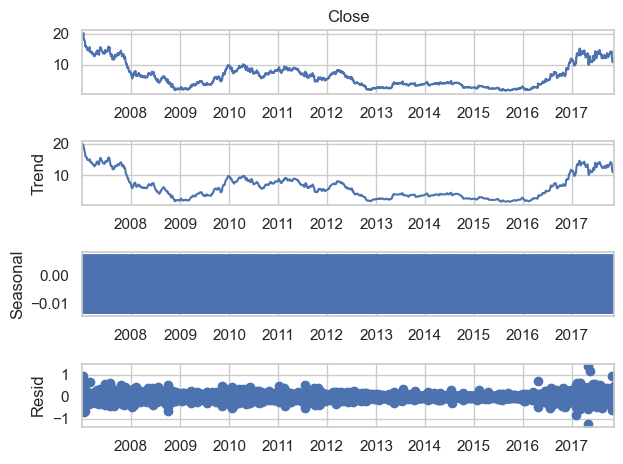

In [23]:
# Automatic Time Series Decomposition
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

# Convert 'Date' column to date format and set it as index
df_AMD_stocks_10y['Date'] = pd.to_datetime(df_AMD_stocks_10y['Date'])
df_AMD_stocks_10y.set_index('Date', inplace=True)

# Sort the DataFrame by date index
df_AMD_stocks_10y.sort_index(inplace=True)

# Frequency of the observations freg = 'B' business days
df_AMD_stocks_10y = df_AMD_stocks_10y.asfreq('B')

# interpolate() means replacement of values if some data is missed
df_AMD_stocks_10y.interpolate(method='time', inplace=True)

# decompose the data using seasonal_decompose() function in the column 'Close'
result = seasonal_decompose(df_AMD_stocks_10y['Close'], model='additive')

result.plot()
pyplot.show()

<a id='7.2'></a>
## 6.2 Checks for Stationarity

<a id='7.2.1'></a>
### 6.2.1. Summary Statistics

A quick and dirty check to see if our time series is not stationary is to check the summary statistics. Let's divide the time series into two (or more) partitions and compare the mean and variance of each group. If they differ and the difference is statistically significant, the time series is likely not stationary.

Ref: Chapter 15 - Copyright Introduction to Time Series Forecasting with Python © Copyright 2020 Jason Brownlee. All Rights Reserved.

In [24]:
# Calculate the mean value of first 125 rows and afterwards
mean1, mean2 = df_AMD_stocks_10y.iloc[:125].Close.mean(), df_AMD_stocks_10y.iloc[125:].Close.mean()

# Calculate the variance value of first 125 rows and afterwards
var1, var2 = df_AMD_stocks_10y.iloc[:125].Close.var(), df_AMD_stocks_10y.iloc[125:].Close.var()

# Display mean and variance of two parts of the time series
print('mean1 = %f, mean2 = %f' % (mean1, mean2))
print('variance1 = %f, variance2 = %f' % (var1, var2))

mean1 = 14.836640, mean2 = 5.958881
variance1 = 2.873237, variance2 = 11.511095


As we can observe, the means and variances of each group are different, which suggests that our time series is stationary. However, to determine if a difference is statistically significant, a statistical test that provides a p-value is commonly used. The p-value indicates the probability of observing a result as extreme as the one observed, under the null hypothesis (the hypothesis that there is no effect or difference).

Common criteria for statistical significance:

p-value < 0.05: It is considered statistically significant.

p-value < 0.01: It is considered very statistically significant.

p-value < 0.001: It is considered extremely statistically significant.

Having said the above, we will now calculate the p-value for our time series through the ADF test.

<a id='7.2.2'></a>
### 6.2.2. Augmented Dickey-Fuller test

The ADF test is a unit root test used to determine if a time series is stationary. The null hypothesis (H0) of the ADF test is that the time series has a unit root, which implies that it is not stationary. It has a stochastic trend. On the other hand, the alternative hypothesis (H1) is that the time series does not have a unit root, which implies that it is stationary.

Ref: Chapter 15 - Copyright Introduction to Time Series Forecasting with Python © Copyright 2020 Jason Brownlee. All Rights Reserved.

In [25]:
# Augmented Dickey-Fuller (stationarity test of time series data)
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller

X = df_AMD_stocks_10y['Close'].dropna()
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.456874
p-value: 0.009166
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


According to the results:

ADF Statistic: -3.456874

This value is compared to the critical values. If the ADF statistic is lower than the critical value, we can reject the null hypothesis with a 5% confidence level, suggesting that the time series is stationary.

p-value: 0.009166

This value tells us the probability that the time series has a unit root. A low p-value (less than 0.05) means that we can reject the null hypothesis and assume that the time series is stationary, which is considered statistically significant.

Critical Values:

1%: -3.433

5%: -2.863

10%: -2.567

These are the critical values for confidence levels of 1%, 5%, and 10%, respectively. If the ADF statistic is lower than these values, we can reject the null hypothesis with that level of confidence.

<a id='7.3'></a>
## 6.3. Use and Remove Trends

Our time series data set may contain a trend. A trend is a continuous increase or decrease in the series over time.
Trends can make a time series non-stationary by introducing a systematic change in the mean of the series over time.
Removing trends makes it easier to model remaining patterns in the data, which can result in more accurate predictions.

In the graph, we can identify that there is no strong trend in the data since the line is relatively flat. But that trend was eliminated anyway through Detrend by Differencing.

Perhaps the simplest method to detrend a time series is by differencing. Specifically, a new series is constructed where the value at the current time step is calculated as the difference between the original observation and the observation at the previous time step.

value(t) = observation(t) − observation(t − 1)

This has the effect of removing a trend from a time series dataset.

Ref: Chapter 13 - Copyright Introduction to Time Series Forecasting with Python © Copyright 2020 Jason Brownlee. All Rights Reserved.

This step that we have just performed is step I of the ARIMA model which I (Integrated): The use of differentiation of raw observations (i.e., subtracting an observation from an observation in the previous time step) to make the time series stationary.

In [26]:
df_AMD_stocks = pd.read_csv('df_AMD_stocks.csv', index_col=0, parse_dates=True)

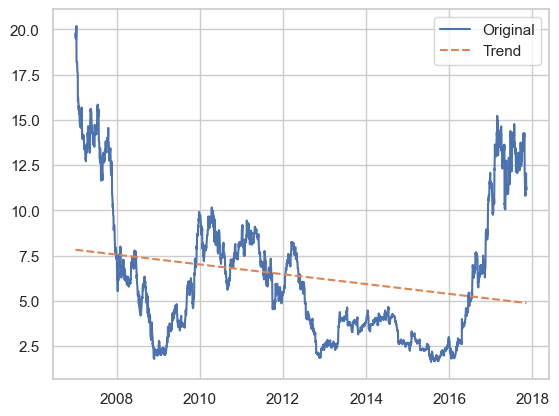

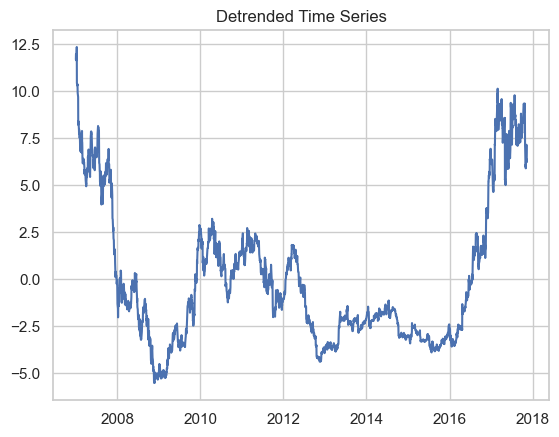

In [27]:
# use a linear model to detrend a time series
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy as np

# Ensure that the DataFrame is sorted by date
df_AMD_stocks_10y.sort_index(inplace=True)

# fit linear model
X = np.array(range(len(df_AMD_stocks_10y))).reshape(-1, 1)
y = df_AMD_stocks_10y['Close'].values
model = LinearRegression()
model.fit(X, y)

# calculate trend
trend = model.predict(X)

# plot trend
pyplot.plot(df_AMD_stocks_10y.index, y, label='Original')
pyplot.plot(df_AMD_stocks_10y.index, trend, label='Trend', linestyle='--')
pyplot.legend()
pyplot.show()

# Detrend
detrended = y - trend

# plot detrend
pyplot.plot(df_AMD_stocks_10y.index, detrended)
pyplot.title('Detrended Time Series')
pyplot.show()


<a id='8'></a>
## 7. ARIMA Model

In [28]:
# import the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa
import warnings
warnings.filterwarnings("ignore")

In [29]:
# plotds is method to plot time series, ACF and PACF
def plotds(xt, nlag = 30, fig_size = (12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax = ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags = 50, ax = ax_acf)
    plot_pacf(xt, lags = 50, ax = ax_pacf)
    plt.tight_layout()
    return None

In [30]:
# Display first 10 records
df_AMD_stocks_10y.head(-5)

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-03,20.080,20.40,19.35,19.520,28107900.0
2007-01-04,19.660,19.86,19.32,19.790,23380300.0
2007-01-05,19.540,19.91,19.54,19.710,15772600.0
2007-01-08,19.710,19.86,19.25,19.470,15814600.0
2007-01-09,19.450,19.71,19.37,19.650,14098100.0
...,...,...,...,...,...
2017-10-30,11.255,11.42,10.65,10.890,137785101.0
2017-10-31,10.760,11.31,10.69,10.985,78600023.0
2017-11-01,11.250,11.29,10.72,10.800,66875483.0


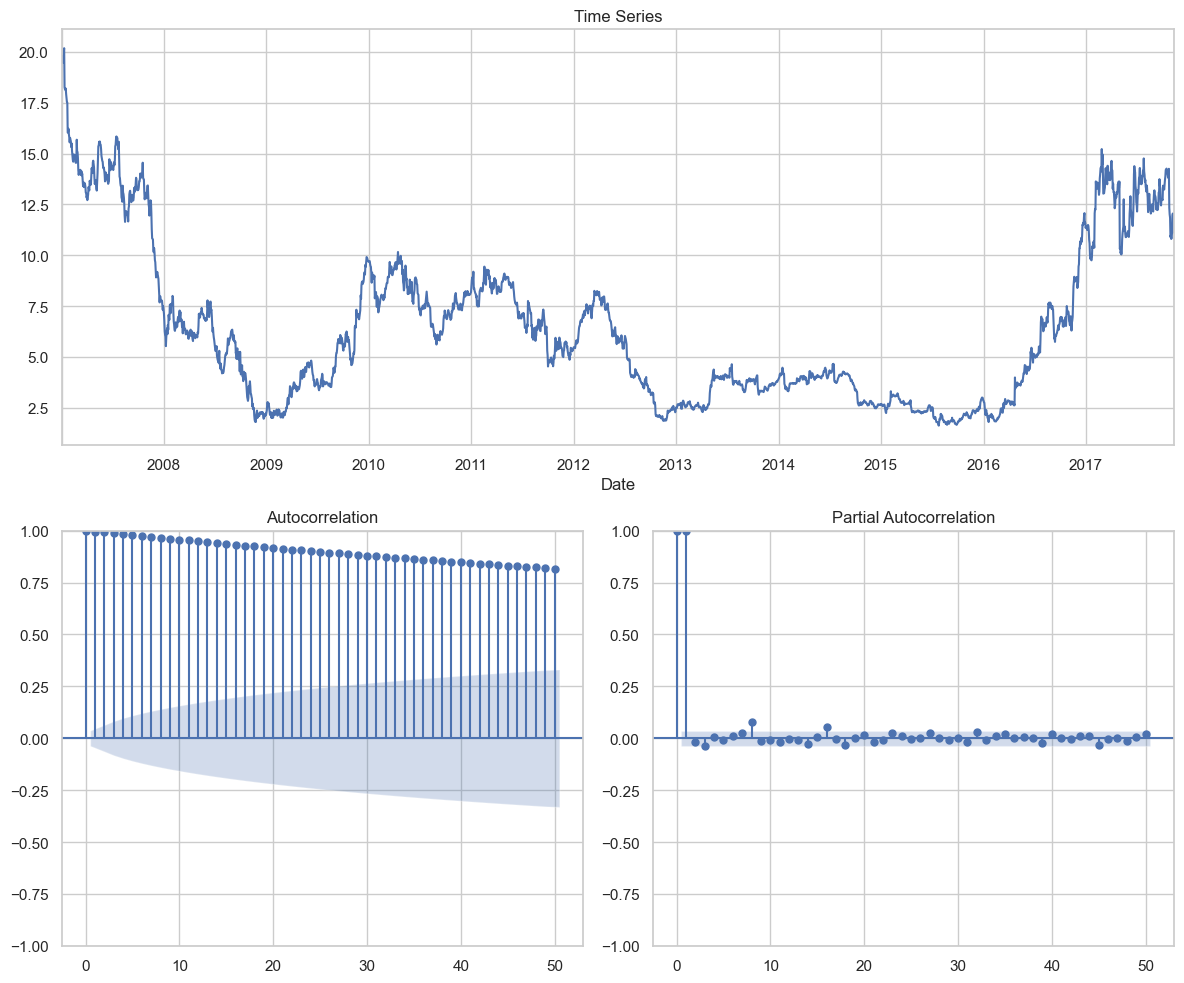

In [31]:
# Display plot of close column and Date index
plotds(df_AMD_stocks_10y['Close'], nlag = 50)

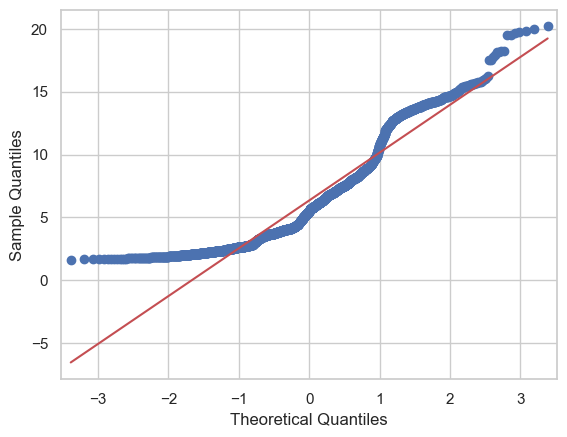

In [32]:
# qqplot for the 'Close' column
x = sm.qqplot(df_AMD_stocks_10y['Close'], line = 's')

In [33]:
from statsmodels.tsa.arima.model import ARIMA

# Call ARIMA function to train the model on the 'Close' price
model = ARIMA(df_AMD_stocks_10y['Close'], order = (1, 1, 0))# p, d, q

# Train ARIMA Model on the 'Close' price dataset
results_AR = model.fit()

In [34]:
# Store one difference value of the 'Close' column / In here we change the data for stationary
first_order_diff = df_AMD_stocks_10y['Close'].diff(1)

# Display the first five records
df_AMD_stocks_10y['Close'].head(), first_order_diff.head()

(Date
 2007-01-03    19.52
 2007-01-04    19.79
 2007-01-05    19.71
 2007-01-08    19.47
 2007-01-09    19.65
 Freq: B, Name: Close, dtype: float64,
 Date
 2007-01-03     NaN
 2007-01-04    0.27
 2007-01-05   -0.08
 2007-01-08   -0.24
 2007-01-09    0.18
 Freq: B, Name: Close, dtype: float64)

In [35]:
# Drop the first row of 'Close' column because It has 'NaN' value
first_order_diff = df_AMD_stocks_10y['Close'].diff(1).dropna()

# Display the first five records
first_order_diff.head()

Date
2007-01-04    0.27
2007-01-05   -0.08
2007-01-08   -0.24
2007-01-09    0.18
2007-01-10    0.36
Freq: B, Name: Close, dtype: float64

Text(0.5, 1.0, 'First-order differences of AMD Stocks during January 2007 to Nov 2017')

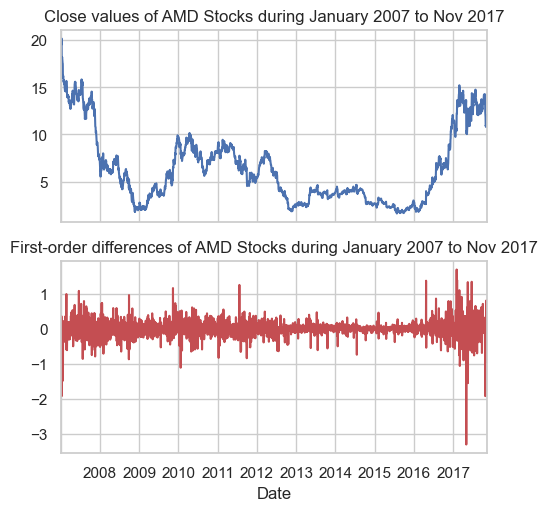

In [36]:
# Declare the fig abd ax as two arguments 
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(5.5, 5.5)
df_AMD_stocks_10y['Close'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Close values of AMD Stocks during January 2007 to Nov 2017')
first_order_diff.plot(ax = ax[1], color = 'r')
ax[1].set_title('First-order differences of AMD Stocks during January 2007 to Nov 2017')

ADF Statistic: -23.210941
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


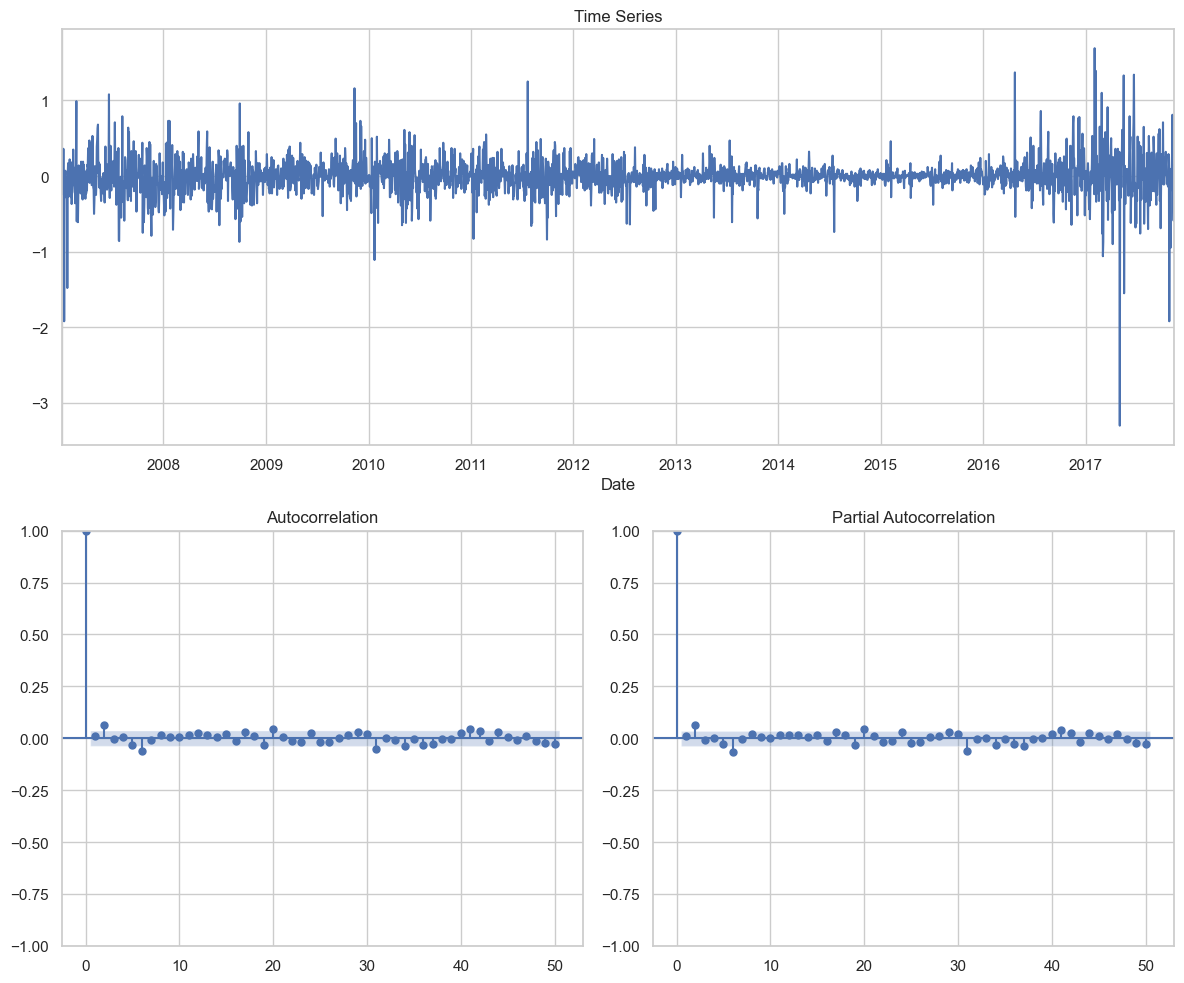

In [37]:
# calculate stationarity test of time series data through differentiation

# plot the data with 50 lags
plotds(first_order_diff, nlag = 50)

# Perform Dicky Fuller test
adf_result = adfuller(first_order_diff)

# Display the outcomes
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -23.210941 is much lower than the critical values; we reject the null hypothesis, suggesting that the time series is stationary.

p-value: 0.000000 strengthens the evidence against the null hypothesis, indicating that the series is stationary.

Critical Values: The critical values for confidence levels of 1%, 5%, and 10% are -3.433, -2.863, and -2.567, respectively. Since the ADF statistic is lower than these three values, we can say with a 1% confidence level that the time series is stationary.

The results strongly suggest that, after differentiation, the time series is definitely stationary.

Additionally, with the Augmented Dickey-Fuller test through differentiation, we eliminate the white noise that we previously had in the Autocorrelation since now all the values are close to 0.

<a id='8.1'></a>
### 7.1. Hyperparameters for ARIMA model

This approach helps us identify which set of hyperparameters might be the best for our ARIMA model based on the AIC criterion. Models with a lower AIC are preferable because they indicate a better balance between goodness of fit and the simplicity (or complexity) of the model, which helps prevent overfitting and select a model that generalizes well to new data.

In this case, our AIC would be (2, 1, 0) with an AIC of -131.8486659.

* p = 1 , Number of autoregressive (AR) terms in the model
* d = 2 , Number of times that the raw observations are differenced, also called the degree of differencing.
* q = 2 , Number of moving average (MA) terms in the model

In [38]:
# A nested loop is written to calculate the AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(df_AMD_stocks_10y['Close'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)

[[0, 1, 0, -123.54432840506016], [0, 1, 1, -121.96895509416505], [0, 1, 2, -131.709466856479], [1, 1, 0, -122.02386174423444], [1, 1, 1, -122.93660591247851], [1, 1, 2, -129.74407127666245], [2, 1, 0, -131.8486659858899], [2, 1, 1, -130.0048436646226], [2, 1, 2, -128.02591759161933], [0, 2, 0, 1801.8885955723365], [0, 2, 1, -116.28304935292667], [0, 2, 2, -114.54718208423907], [1, 2, 0, 886.2794169787662], [1, 2, 1, -114.58020912333568], [1, 2, 2, -113.57022332493182], [2, 2, 0, 625.6599957273718], [2, 2, 1, -123.58271895875612], [2, 2, 2, -121.44634142112227]]


In [39]:
# Declare and initialise an object 'arima_obj' by calling a method 'ARIMA()'
arima_obj = ARIMA(df_AMD_stocks_10y['Close'].tolist(), order = (2, 1, 0))

# Train the ARIMA model by calling a method fit()
arima_obj_fit = arima_obj.fit()

# Display the summary of the trained model
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2833
Model:                 ARIMA(2, 1, 0)   Log Likelihood                  68.924
Date:                Fri, 03 Nov 2023   AIC                           -131.849
Time:                        12:24:44   BIC                           -114.002
Sample:                             0   HQIC                          -125.411
                               - 2833                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0123      0.013      0.953      0.341      -0.013       0.038
ar.L2          0.0646      0.016      4.138      0.000       0.034       0.095
sigma2         0.0558      0.000    122.457      0.000       0.055       0.057
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             55244.39
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -1.06
Prob(H) (two-sided):                  0.40   Kurtosis:                        24.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

* AIC (Akaikes Information Criterion): Estimator of the relative quality of statistical models for a given set of data. The AIC deals with the trade-off betwen the goodness of fit of the model and the simplicity of the model.


* BIC (Bayesian Information Criterion): Similar to the AIC, but with a larger penalty term for the number of parameters in the model.


* Hannan–Quinn information criterion (HQC): is a criterion for model selection. It is an alternative to Akaike information criterion (AIC) and Bayesian information criterion (BIC). It is given as. where. is the log-likelihood, k is the number of parameters, and n is the number of observations.

In [40]:
# Declare the array 'pred' and append the values 
pred = arima_obj_fit.fittedvalues

# Add a new column 'ARIMA' into dataframe
df_AMD_stocks_10y['ARIMA'] = pred

# Residues and fitted values are added and stored into dataframe
diffval = arima_obj_fit.resid + arima_obj_fit.fittedvalues

# Add a column 'diffval' into dataframe
df_AMD_stocks_10y['diffval'] = diffval

# Display first five records
df_AMD_stocks_10y.head()

,Open,High,Low,Close,Volume,ARIMA,diffval
Date,,,,,,,
2007-01-03,20.08,20.40,19.35,19.52,28107900.0,0.000000,19.52
2007-01-04,19.66,19.86,19.32,19.79,23380300.0,19.520000,19.79
2007-01-05,19.54,19.91,19.54,19.71,15772600.0,19.793543,19.71
2007-01-08,19.71,19.86,19.25,19.47,15814600.0,19.726469,19.47
2007-01-09,19.45,19.71,19.37,19.65,14098100.0,19.461884,19.65


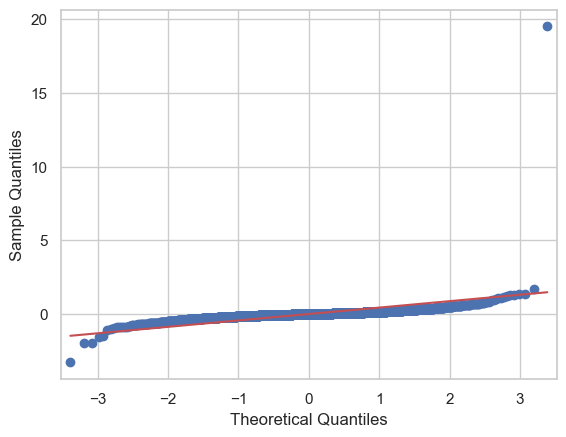

In [41]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
# Call qqplot() for arima_obj_fit
x = sm.qqplot(arima_obj_fit.resid, line = 's')

In [42]:
print(df_AMD_stocks_10y['diffval'], df_AMD_stocks_10y['ARIMA'])

Date
2007-01-03    19.52
2007-01-04    19.79
2007-01-05    19.71
2007-01-08    19.47
2007-01-09    19.65
              ...  
2017-11-06    11.93
2017-11-07    12.05
2017-11-08    11.71
2017-11-09    11.12
2017-11-10    11.26
Freq: B, Name: diffval, Length: 2833, dtype: float64 Date
2007-01-03     0.000000
2007-01-04    19.520000
2007-01-05    19.793543
2007-01-08    19.726469
2007-01-09    19.461884
                ...    
2017-11-06    11.126545
2017-11-07    11.957391
2017-11-08    12.103824
2017-11-09    11.713583
2017-11-10    11.090785
Freq: B, Name: ARIMA, Length: 2833, dtype: float64


Text(0, 0.5, 'Closing')

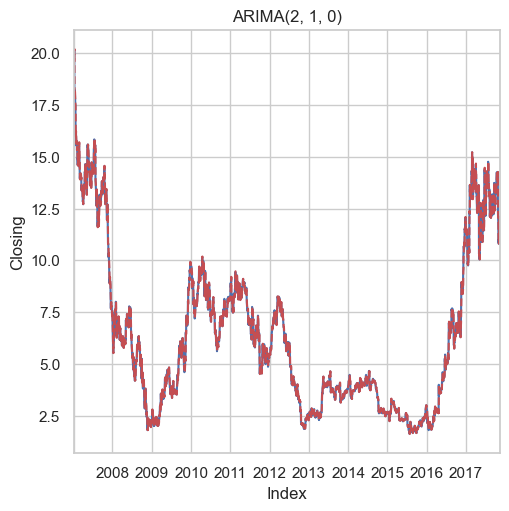

In [43]:
# Declare the objects f and array axarr
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(5.5, 5.5)

# Ignore first two rows because of difference factor d = 1
df_AMD_stocks_10y['diffval'].iloc[1:].plot(color = 'b', linestyle = '-', ax = axarr)
df_AMD_stocks_10y['ARIMA'].iloc[1:].plot(color = 'r', linestyle = '--', ax = axarr)
axarr.set_title('ARIMA(2, 1, 0)')
plt.xlabel('Index')
plt.ylabel('Closing')

Confidence intervals provide a range of values that are believed to contain the true value of the parameter being predicted, with a certain level of confidence.

80% confidence interval: There is an 80% probability that the true future value is between 10.921 and 11.526, and the point forecast is 11.224. This is the narrowest range and reflects the least certainty.

90% Confidence Interval: There is a 90% probability that the true future value is between 10.835 and 11.612, with the predicted point still at 11.224. The range here is wider than the 80% interval, meaning it provides more certainty about where the true value lies.

95% Confidence Interval: There is a 95% probability that the true future value is between 10.761 and 11.686. As the confidence level increases, the range also increases, because we become more conservative and therefore more confident that the interval contains the true value.

99% Confidence Interval: There is a 99% probability that the true future value is between 10.615 and 11,832. This is the widest range and offers the highest level of confidence that the true value is within this range.

The point forecast (11.224) is the model's best estimate for the next value in the series. Confidence intervals reflect the uncertainty around that forecast; As the confidence level increases, the intervals become wider to account for more risk and variability. These ranges are particularly useful for risk management as they provide a range within which the true value is likely to lie, rather than a single point estimate.


Reference: https://machinelearningmastery.com/time-series-forecast-uncertainty-using-confidence-intervals-python/

In [44]:
# Confidence Interval
result = arima_obj_fit.get_forecast()
forecast = result.predicted_mean

# summarize confidence intervals
intervals = [0.2, 0.1, 0.05, 0.01]

for a in intervals:
    ci = result.conf_int(alpha=a)
    print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, ci[0,0], ci[0,1]))

80.0% Confidence Interval: 11.224 between 10.921 and 11.526
90.0% Confidence Interval: 11.224 between 10.835 and 11.612
95.0% Confidence Interval: 11.224 between 10.761 and 11.686
99.0% Confidence Interval: 11.224 between 10.615 and 11.832


RMSE (Root Mean Square Error) is a measure of the quality of a predictive model. In this case, an RMSE of 0.267 indicates how much the ARIMA model predictions deviate, on average, from the actual values on the test set.

An RMSE of 0.267 means that the model predictions, on average, deviated approximately 0.267 units from the actual values.


Reference: Chapter 26 - Copyright Introduction to Time Series Forecasting with Python © Copyright 2020 Jason Brownlee. All Rights Reserved.

In [45]:
# grid search ARIMA parameters for time series
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# evaluate an ARIMA model for a given order (2,1,0)
arima_order = (2, 1, 0)

def evaluate_arima_model(X, arima_order):
    # Preparar el conjunto de datos de entrenamiento
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    # Predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        
    # Root Mean Square Error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

X = df_AMD_stocks_10y['Close'].values

rmse = evaluate_arima_model(X, arima_order)
print('RMSE: %.3f' % rmse)

RMSE: 0.267


<a id='9'></a>
# 8. Comparison Linear Regression vs ARIMA

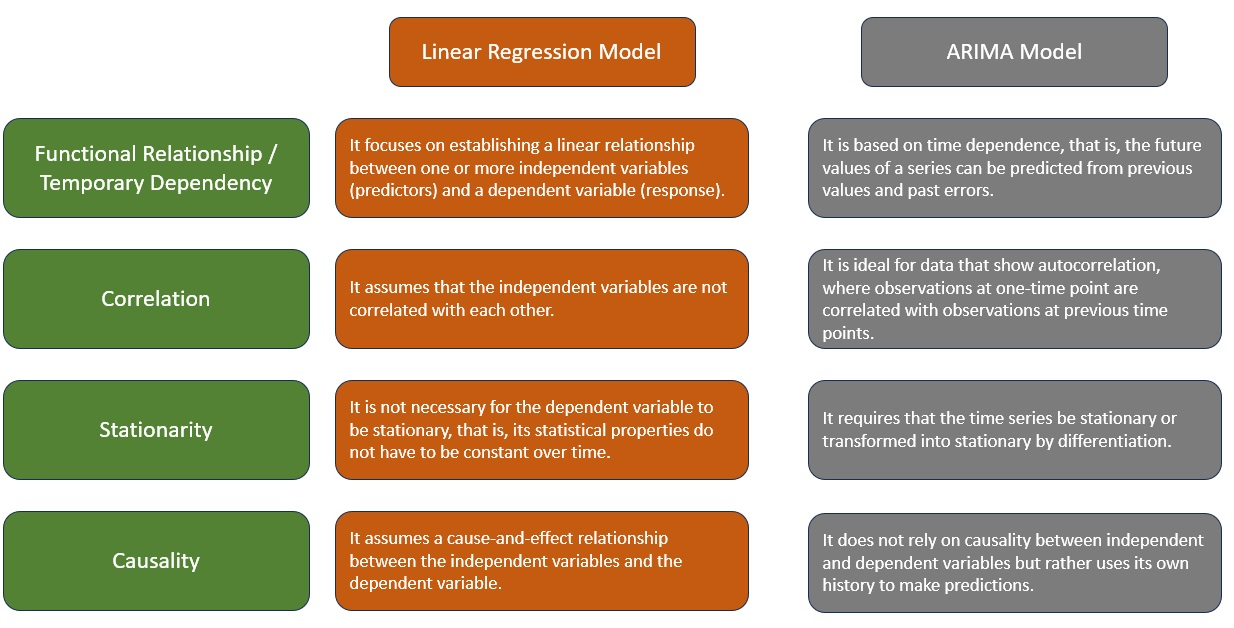

In [47]:
from IPython.display import Image
Image(filename =r'LR_vs_ARIMA.jpg')

<a id='10'></a>
# 9. References